In [391]:
import sys
sys.path.append("../../src")

In [392]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [393]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [394]:
import data

In [395]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id",
                             "practice_sentence"))

EXPERIMENT_ID = "03_production_swarm-givenness"
response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "survey-multi-choice-ext")] \
    .reset_index().set_index(["uniqueid", "trial_index"])

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.


In [396]:
response_df.head()

condition  \
uniqueid                                      trial_index              
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3                    0   
                                              5                    0   
                                              6                    0   
                                              7                    0   
                                              8                    0   

                                                           counterbalance  \
uniqueid                                      trial_index                   
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3                         0   
                                              5                         0   
                                              6                         0   
                                              7                         0   
                                              8                         0   

                                                                             assignmentId  \
uniqueid                                      trial_index                                   
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            3WI0P0II62GI8SB6J7KJ54C3AVURDP   
                                              5            3WI0P0II62GI8SB6J7KJ54C3AVURDP   
                                              6            3WI0P0II62GI8SB6J7KJ54C3AVURDP   
                                              7            3WI0P0II62GI8SB6J7KJ54C3AVURDP   
                                              8            3WI0P0II62GI8SB6J7KJ54C3AVURDP   

                                                                 workerId  \
uniqueid                                      trial_index                   
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            A2B0P02XLCS5X6   
                                              5            A2B0P02XLCS5X6   
                                              6            A2B0P02XLCS5X6   
                                              7            A2B0P02XLCS5X6   
                                              8            A2B0P02XLCS5X6   

                                                                                    hitId  \
uniqueid                                      trial_index                                   
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   
                                              5            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   
                                              6            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   
                                              7            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   
                                              8            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   

                                                                        trial_type  \
uniqueid                                      trial_index                            
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            survey-multi-choice-ext   
                                              5            survey-multi-choice-ext   
                                              6            survey-multi-choice-ext   
                                              7            survey-multi-choice-ext   
                                              8            survey-multi-choice-ext   

                                                               rt  \
uniqueid                                      trial_index           
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            8325.9   
                                              5            2015.6   
                                              6            2965.3   
                                              7            1613.1   
                                              8            1398.9   

                                                          internal_node_id  \
uniqu

In [397]:
# Expand condition labels, which are tuples
response_df = pd.concat([response_df, response_df.condition_id.apply(pd.Series).rename(columns=lambda x: f"condition_{x}")], axis=1) \
    .drop(columns="condition_id")

In [398]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 1

In [399]:
# dtype fixes
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [400]:
response_df.head()

condition  \
uniqueid                                      trial_index              
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3                    0   
                                              5                    0   
                                              6                    0   
                                              7                    0   
                                              8                    0   

                                                           counterbalance  \
uniqueid                                      trial_index                   
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3                         0   
                                              5                         0   
                                              6                         0   
                                              7                         0   
                                              8                         0   

                                                                             assignmentId  \
uniqueid                                      trial_index                                   
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            3WI0P0II62GI8SB6J7KJ54C3AVURDP   
                                              5            3WI0P0II62GI8SB6J7KJ54C3AVURDP   
                                              6            3WI0P0II62GI8SB6J7KJ54C3AVURDP   
                                              7            3WI0P0II62GI8SB6J7KJ54C3AVURDP   
                                              8            3WI0P0II62GI8SB6J7KJ54C3AVURDP   

                                                                 workerId  \
uniqueid                                      trial_index                   
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            A2B0P02XLCS5X6   
                                              5            A2B0P02XLCS5X6   
                                              6            A2B0P02XLCS5X6   
                                              7            A2B0P02XLCS5X6   
                                              8            A2B0P02XLCS5X6   

                                                                                    hitId  \
uniqueid                                      trial_index                                   
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   
                                              5            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   
                                              6            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   
                                              7            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   
                                              8            3909MD9T2Z5NAOM4Y5Q76DKFC18EFH   

                                                                        trial_type  \
uniqueid                                      trial_index                            
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            survey-multi-choice-ext   
                                              5            survey-multi-choice-ext   
                                              6            survey-multi-choice-ext   
                                              7            survey-multi-choice-ext   
                                              8            survey-multi-choice-ext   

                                                               rt  \
uniqueid                                      trial_index           
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP 3            8325.9   
                                              5            2015.6   
                                              6            2965.3   
                                              7            1613.1   
                                              8            1398.9   

                                                          internal_node_id  \
uniqu

In [401]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [402]:
subjects = set(response_df.index.get_level_values("uniqueid"))
len(subjects)

29

### Demo

In [403]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

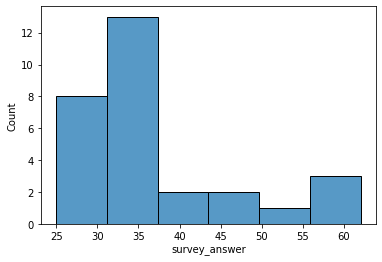

In [404]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [405]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    18
Master's degree       9
Ph.D.                 1
Some college          1
Name: survey_answer, dtype: int64

In [406]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    28
No      1
Name: survey_answer, dtype: int64

### Comments

In [407]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid                                            
35           A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP                                                 interesting
             A2OG7XGWOX5ZEF:3A1PQ49WVI5BR3HR79OUQY9OYPTH1S                                                          no
             A1PVI5Q2GBRIYN:3E4GGUZ1T9F9IE0VWYR589ZLICBK2G                                                 interesting
             A23082QIMOPHGM:33UKMF931A825WKV9MPTANV712FTTN                                                        good
             A002160837SWJFPIAI7L7:3KB8R4ZV1FVY4548P0Z1BAAW518BG7                                                   no
             A1AKL5YH9NLD2V:31LVTDXBL8Y164ZYWOI7OHK8J4XLR0                                                No comments.
             ASC9DUCC64M3P:3KIBXJ1WD6INPLP0JWP2FM2OJH7OKQ                                                             
             A1TB04QMOLJMZN:3H0W84IWBLQN0YP6F2V3BMUOA7VREI                                           

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

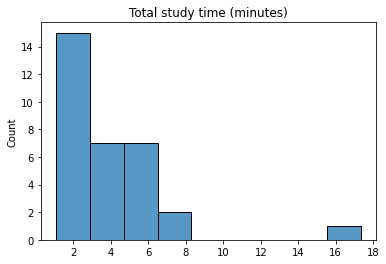

In [408]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [409]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    3.834491
std     3.093772
Name: rt, dtype: float64

### Response times

In [410]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

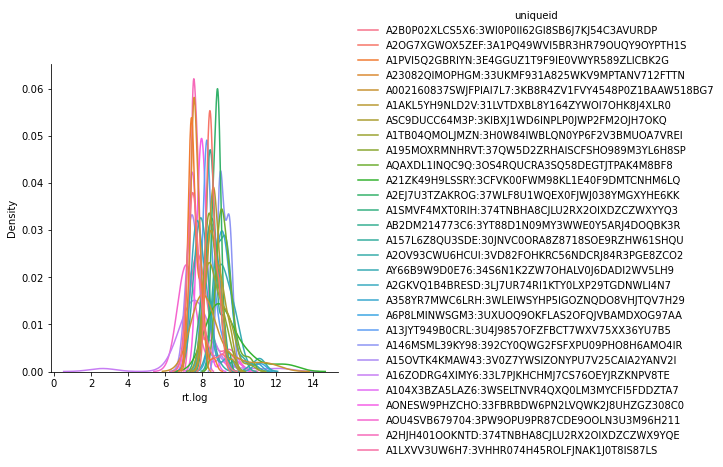

In [411]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

## Attention checks

### Practice round

In [412]:
practice_attention_failures = response_df[response_df.practice_sentence == True].survey_answer == "bad"
practice_attention_failures = practice_attention_failures.loc[practice_attention_failures]
practice_attention_failures

uniqueid                                       trial_index
A1PVI5Q2GBRIYN:3E4GGUZ1T9F9IE0VWYR589ZLICBK2G  3              True
A2OV93CWU6HCUI:3VD82FOHKRC56NDCRJ84R3PGE8ZCO2  3              True
A2GKVQ1B4BRESD:3LJ7UR74RI1KTY0LXP29TGDNWLI4N7  3              True
A15OVTK4KMAW43:3V0Z7YWSIZONYPU7V25CAIA2YANV2I  3              True
A104X3BZA5LAZ6:3WSELTNVR4QXQ0LM3MYCFI5FDDZTA7  3              True
AONESW9PHZCHO:33FBRBDW6PN2LVQWK2J8UHZGZ308C0   3              True
A1LXVV3UW6H7:3VHHR074H45ROLFJNAK1J0T8IS87LS    3              True
Name: survey_answer, dtype: bool

### Fillers

<AxesSubplot:xlabel='survey_answer'>

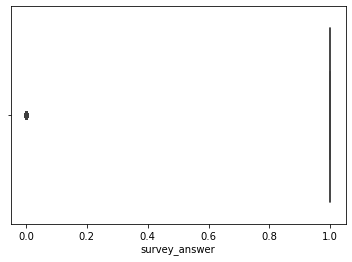

In [413]:
# some fillers aren't good, upon reflection. drop them from evaluation
drop_fillers = [6]

filler_stats = response_df[response_df.condition_0 == "filler"].reset_index() \
    .groupby(["uniqueid", "item_id", "condition_1"]).apply(lambda xs: (xs[~xs.item_id.isin(drop_fillers)].survey_answer == "good").astype(float))
sns.boxplot(data=filler_stats.reset_index(), x="survey_answer", hue="uniqueid")

In [414]:
filler_stats_summary = filler_stats.groupby("uniqueid").mean()
filler_stats_summary.sort_values()

uniqueid
AONESW9PHZCHO:33FBRBDW6PN2LVQWK2J8UHZGZ308C0            0.363636
A1PVI5Q2GBRIYN:3E4GGUZ1T9F9IE0VWYR589ZLICBK2G           0.363636
A15OVTK4KMAW43:3V0Z7YWSIZONYPU7V25CAIA2YANV2I           0.454545
A16ZODRG4XIMY6:33L7PJKHCHMJ7CS76OEYJRZKNPV8TE           0.454545
A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP           0.454545
AOU4SVB679704:3PW9OPU9PR87CDE9OOLN3U3M96H211            0.545455
A2OV93CWU6HCUI:3VD82FOHKRC56NDCRJ84R3PGE8ZCO2           0.545455
A1LXVV3UW6H7:3VHHR074H45ROLFJNAK1J0T8IS87LS             0.545455
A1SMVF4MXT0RIH:374TNBHA8CJLU2RX2OIXDZCZWXYYQ3           0.636364
AY66B9W9D0E76:34S6N1K2ZW7OHALV0J6DADI2WV5LH9            0.727273
A2HJH401OOKNTD:374TNBHA8CJLU2RX2OIXDZCZWX9YQE           0.727273
A2GKVQ1B4BRESD:3LJ7UR74RI1KTY0LXP29TGDNWLI4N7           0.818182
A23082QIMOPHGM:33UKMF931A825WKV9MPTANV712FTTN           0.818182
A1TB04QMOLJMZN:3H0W84IWBLQN0YP6F2V3BMUOA7VREI           0.818182
A21ZK49H9LSSRY:3CFVK00FWM98KL1E40F9DMTCNHM6LQ           0.909091
A157L6Z8QU3SDE:3

<AxesSubplot:xlabel='item_id', ylabel='survey_answer'>

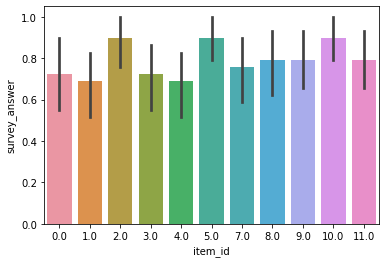

In [415]:
sns.barplot(data=filler_stats.reset_index(), x="item_id", y="survey_answer")

In [416]:
# What are fillers that are commonly missed, for high-scoring people?
tmp = filler_stats.loc[filler_stats_summary[filler_stats_summary > 0.7].index]
tmp[tmp == 0].groupby(["item_id", "condition_1"]).size().sort_values(ascending=False)

item_id  condition_1   
1.0      mwe               5
0.0      active-passive    3
3.0      active-passive    3
4.0      mwe               2
11.0     order             2
5.0      order             1
8.0      order             1
Name: survey_answer, dtype: int64

## Final data processing

In [417]:
exp_items = response_df[(response_df.condition_0 != "filler") & response_df.practice_sentence.isna()]

### Filter based on practice and attention checks

In [418]:
drop_pct = np.round(len(practice_attention_failures) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(practice_attention_failures)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(practice_attention_failures.index.get_level_values("uniqueid")))
exp_items = exp_items.drop(practice_attention_failures.index.get_level_values("uniqueid"), level="uniqueid")

attention_drops = filler_stats_summary[(filler_stats_summary < 0.7)]
drop_pct = np.round(len(attention_drops) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

7 subjects (24.1%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A1PVI5Q2GBRIYN:3E4GGUZ1T9F9IE0VWYR589ZLICBK2G
	A2OV93CWU6HCUI:3VD82FOHKRC56NDCRJ84R3PGE8ZCO2
	A2GKVQ1B4BRESD:3LJ7UR74RI1KTY0LXP29TGDNWLI4N7
	A15OVTK4KMAW43:3V0Z7YWSIZONYPU7V25CAIA2YANV2I
	A104X3BZA5LAZ6:3WSELTNVR4QXQ0LM3MYCFI5FDDZTA7
	AONESW9PHZCHO:33FBRBDW6PN2LVQWK2J8UHZGZ308C0
	A1LXVV3UW6H7:3VHHR074H45ROLFJNAK1J0T8IS87LS
9 subjects (31.0%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A15OVTK4KMAW43:3V0Z7YWSIZONYPU7V25CAIA2YANV2I
	A16ZODRG4XIMY6:33L7PJKHCHMJ7CS76OEYJRZKNPV8TE
	A1LXVV3UW6H7:3VHHR074H45ROLFJNAK1J0T8IS87LS
	A1PVI5Q2GBRIYN:3E4GGUZ1T9F9IE0VWYR589ZLICBK2G
	A1SMVF4MXT0RIH:374TNBHA8CJLU2RX2OIXDZCZWXYYQ3
	A2B0P02XLCS5X6:3WI0P0II62GI8SB6J7KJ54C3AVURDP
	A2OV93CWU6HCUI:3VD82FOHKRC56NDCRJ84R3PGE8ZCO2
	AONESW9PHZCHO:33FBRBDW6PN2LVQWK2J8UHZGZ308C0
	AOU4SVB679704:3PW9OPU9PR87CDE9OOLN3U3M96H211


In [419]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

18 subjects remaining.


### Compute match

In [420]:
exp_items["match"] = exp_items.apply(lambda r: r.survey_answer == ("agent" if r.agent_is_given else "location"), axis=1)

### Merge in materials

In [421]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [455]:
keep_cols = ["A", "V", "L", "AV", "P", "A concrete?", "A countable?", "given position"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Export

In [456]:
merged_df.to_csv("merged_df.csv")

## Analysis

<AxesSubplot:xlabel='agent_is_given', ylabel='match'>

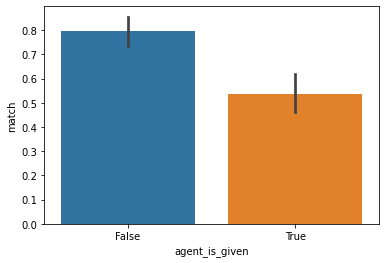

In [439]:
sns.barplot(data=exp_items.reset_index(), x="agent_is_given", y="match")

### Item exposure

In [440]:
merged_df[merged_df.condition_0 != "filler"] \
    .groupby(["item_id", "AV", "agent_is_given"]).size().sort_values()

item_id  AV                  agent_is_given
25.0     energy humm         True               5
22.0     lights glow         False              6
58.0     anticipation tingl  True               7
39.0     sewage runn         False              7
31.0     excitement puls     True               7
24.0     frogs hopp          False              7
64.0     worms wriggl        True               8
6.0      terror cours        False              8
56.0     tadpoles swimm      True               8
18.0     birds flutter       True               8
20.0     fireflies glimmer   True               8
41.0     trepidation shak    True               9
                             False              9
30.0     fear prickl         True               9
                             False              9
4.0      people bustl        False              9
19.0     bubbles foam        True               9
4.0      people bustl        True               9
7.0      excitement crackl   False              9
      

### Concreteness

<AxesSubplot:xlabel='agent_is_given', ylabel='match'>

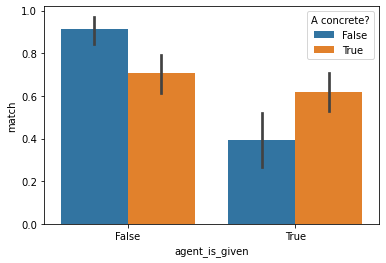

In [441]:
sns.barplot(data=merged_df[merged_df.condition_0 != "filler"].reset_index(), x="agent_is_given", y="match", hue="A concrete?")

item vignettes corresponding to above barplot, as a reminder:

- ~agent_is_given
    - ~concrete: The restaurant across the street was empty, but {the theater was crackling with excitement / excitement was crackling in the theater}.
    - concrete: The cart is mostly clean by this point, but {the bucket is wriggling with worms / worms are wriggling in the bucket}.
- agent_is_given
    - ~concrete: X was worried the crowd would be asleep by this time of night, but {excitement is crackling in the theater / the theater is crackling with excitement}.
    - concrete: X was looking for fresh fruit, but {worms are wriggling in the bucket / the bucket is wriggling with worms}. 

<AxesSubplot:xlabel='A concrete?', ylabel='agent_is_subject'>

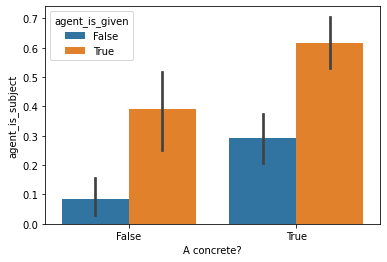

In [442]:
merged_df["agent_is_subject"] = merged_df.survey_answer == "agent"
sns.barplot(data=merged_df.reset_index(), x="A concrete?", y="agent_is_subject", hue="agent_is_given")

In [443]:
merged_df.groupby("A concrete?").apply(lambda xs: xs[xs.agent_is_given].agent_is_subject.mean() - xs[~xs.agent_is_given].agent_is_subject.mean())

A concrete?
False    0.307143
True     0.325980
dtype: float64

<AxesSubplot:xlabel='Agent subject(Agent topic - Location topic)', ylabel='Count'>

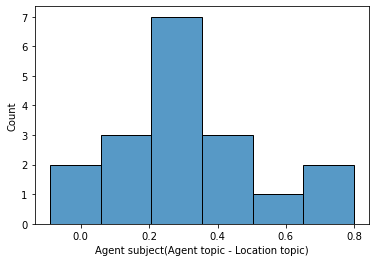

In [444]:
def compute_item_differences(rows):
    rows = rows.set_index("agent_is_given")
    if True not in rows.index or False not in rows.index:
        return np.nan
    return rows.loc[True, "agent_is_subject"].mean() - rows.loc[False, "agent_is_subject"].mean()
item_differences = merged_df.groupby(["item_id", "A concrete?"]).apply(compute_item_differences).rename("Agent subject(Agent topic - Location topic)")
sns.histplot(item_differences)

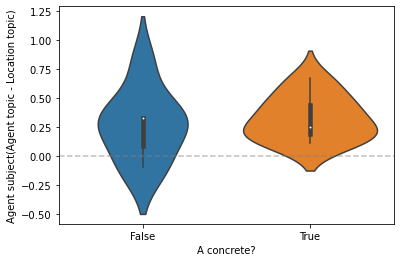

In [445]:
ax = sns.violinplot(data=item_differences.reset_index(), y="Agent subject(Agent topic - Location topic)", x="A concrete?")
ax.axhline(0.0, c="gray", alpha=0.5, linestyle="--")

In [430]:
# bootstrap-estimate difference for concrete items, resampling by item
def f(rows):
    pos_rows = [agent_is_subject for agent_is_given, agent_is_subject in rows if agent_is_given]
    neg_rows = [agent_is_subject for agent_is_given, agent_is_subject in rows if not agent_is_given]
    return np.mean(pos_rows) - np.mean(neg_rows)

def estimate_bootstrap(rows):
    item_difference_bootstrap = sns.algorithms.bootstrap(rows[["agent_is_given", "agent_is_subject"]], units=rows.item_id, func=f)
    item_difference_ci = np.percentile(item_difference_bootstrap, [0.25, 0.975])
    return pd.Series({"low": item_difference_ci[0], "high": item_difference_ci[1]})

merged_df.groupby("A concrete?").apply(estimate_bootstrap)

,low,high
A concrete?,,
False,-0.033662,0.018414
True,0.092579,0.132887


### Grammatical position of antecedent

<AxesSubplot:xlabel='given position', ylabel='agent_is_subject'>

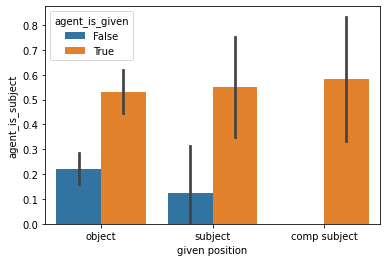

In [447]:
sns.barplot(data=merged_df.reset_index(), x="given position", y="agent_is_subject", hue="agent_is_given")

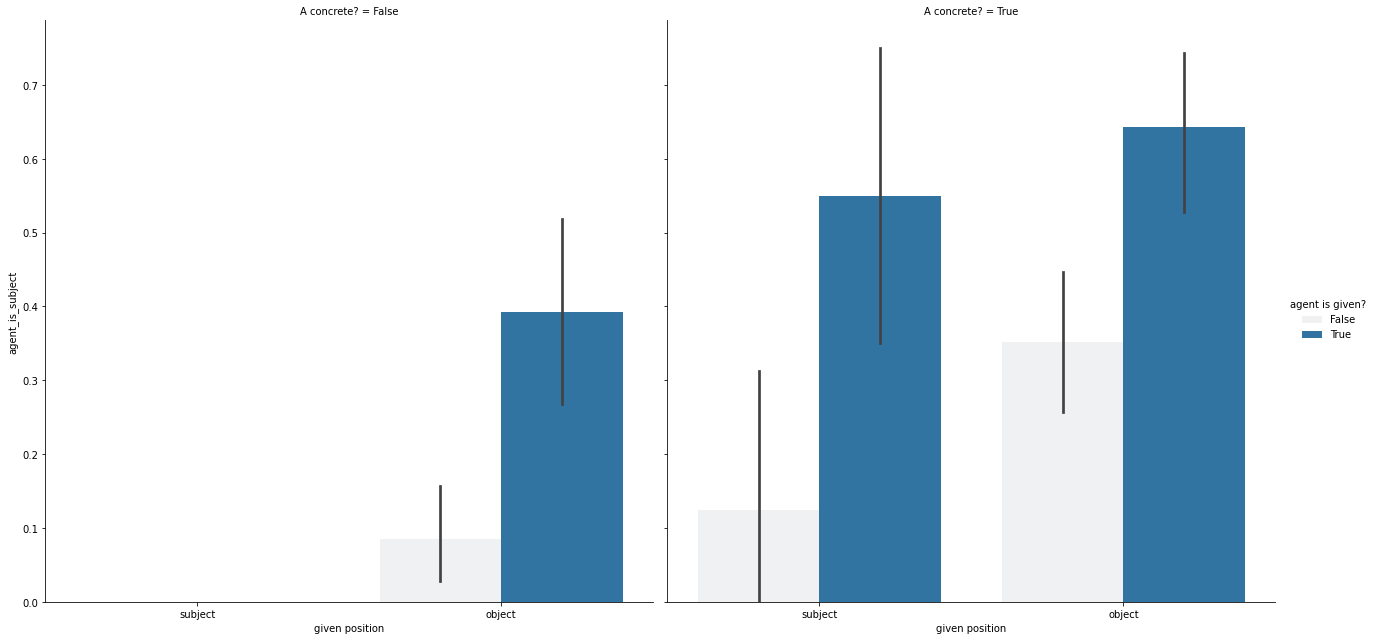

In [453]:
g = sns.FacetGrid(data=merged_df.reset_index(), col="A concrete?", height=9)
g.map(sns.barplot, "given position", "agent_is_subject", "agent_is_given", order=["subject", "object"], hue_order=[False, True])
g.add_legend(title="agent is given?")

### By subject

<AxesSubplot:xlabel='uniqueid', ylabel='match'>

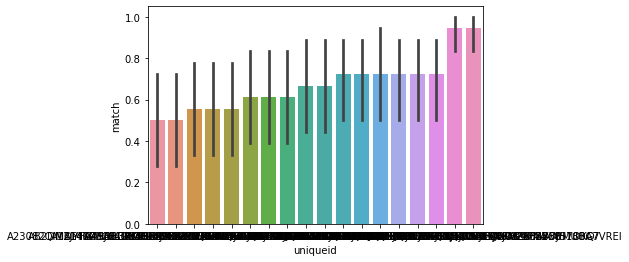

In [431]:
graph_data = merged_df[merged_df.condition_0 != "filler"].reset_index()
order = graph_data.groupby("uniqueid").match.mean().sort_values().index
sns.barplot(data=merged_df[merged_df.condition_0 != "filler"].reset_index(),
            x="uniqueid", order=order,
            y="match")

<AxesSubplot:xlabel='uniqueid', ylabel='match'>

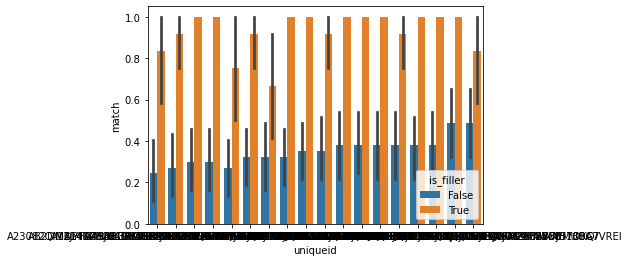

In [432]:
# correlation between filler performance and match?
order = merged_df.groupby("uniqueid").match.mean().sort_values().index

# Bring back the fillers!
filler_data = response_df.loc[set(merged_df.index.get_level_values("uniqueid"))].copy()
filler_data["match"] = "good" == filler_data.survey_answer
graph_data = pd.concat([merged_df, filler_data])
graph_data["is_filler"] = graph_data.condition_0 == "filler"

sns.barplot(data=graph_data.reset_index(), x="uniqueid", order=order, y="match", hue="is_filler")

### By item

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'anticipation tingl'),
  Text(1, 0, 'people bustl'),
  Text(2, 0, 'debris flow'),
  Text(3, 0, 'frogs hopp'),
  Text(4, 0, 'worms wriggl'),
  Text(5, 0, 'birds flutter'),
  Text(6, 0, 'energy humm'),
  Text(7, 0, 'excitement crackl'),
  Text(8, 0, 'excitement puls'),
  Text(9, 0, 'trepidation shak'),
  Text(10, 0, 'fireflies glimmer'),
  Text(11, 0, 'tadpoles swimm'),
  Text(12, 0, 'fear prickl'),
  Text(13, 0, 'bubbles foam'),
  Text(14, 0, 'lights glow'),
  Text(15, 0, 'cockroaches creep'),
  Text(16, 0, 'sewage runn'),
  Text(17, 0, 'terror cours')])

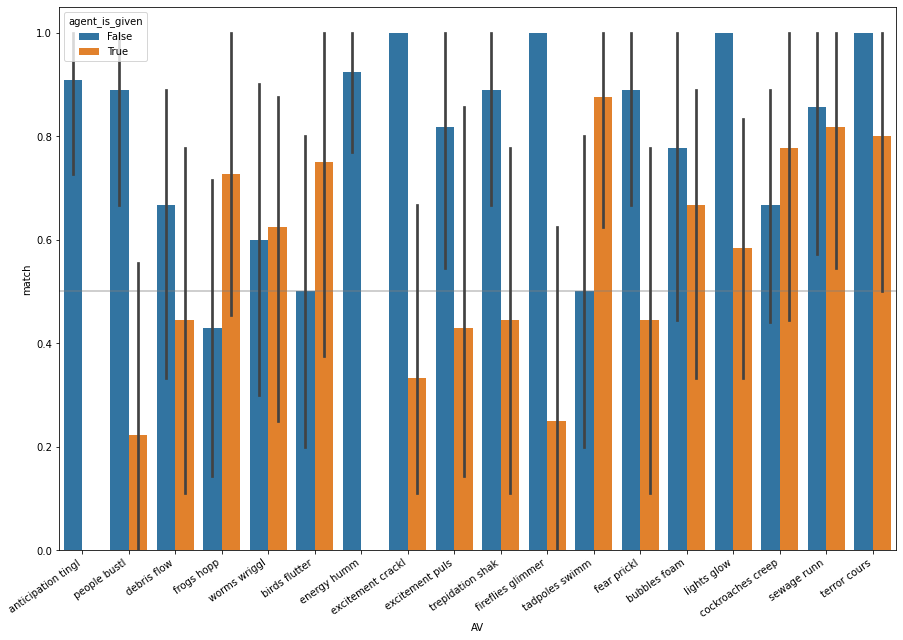

In [433]:
f, ax = plt.subplots(figsize=(15, 10))
ax.axhline(0.5, c="gray", alpha=0.5)

order = merged_df.groupby("AV").match.mean().sort_values().index
sns.barplot(data=merged_df.reset_index(), x="AV", order=order, hue="agent_is_given", y="match")
plt.xticks(rotation=35, ha="right")